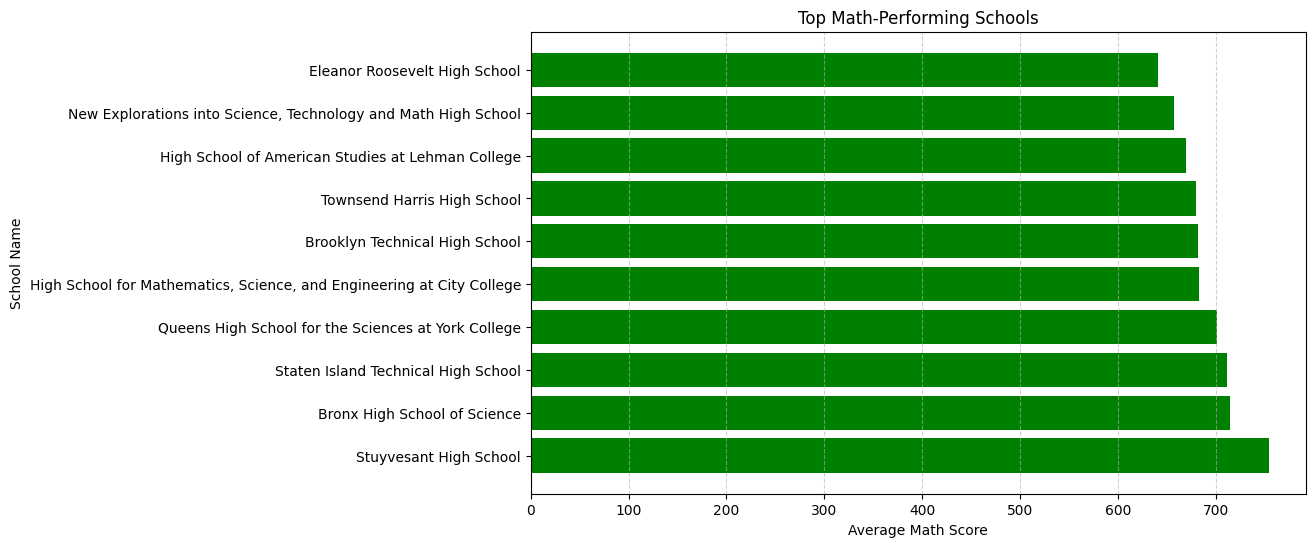

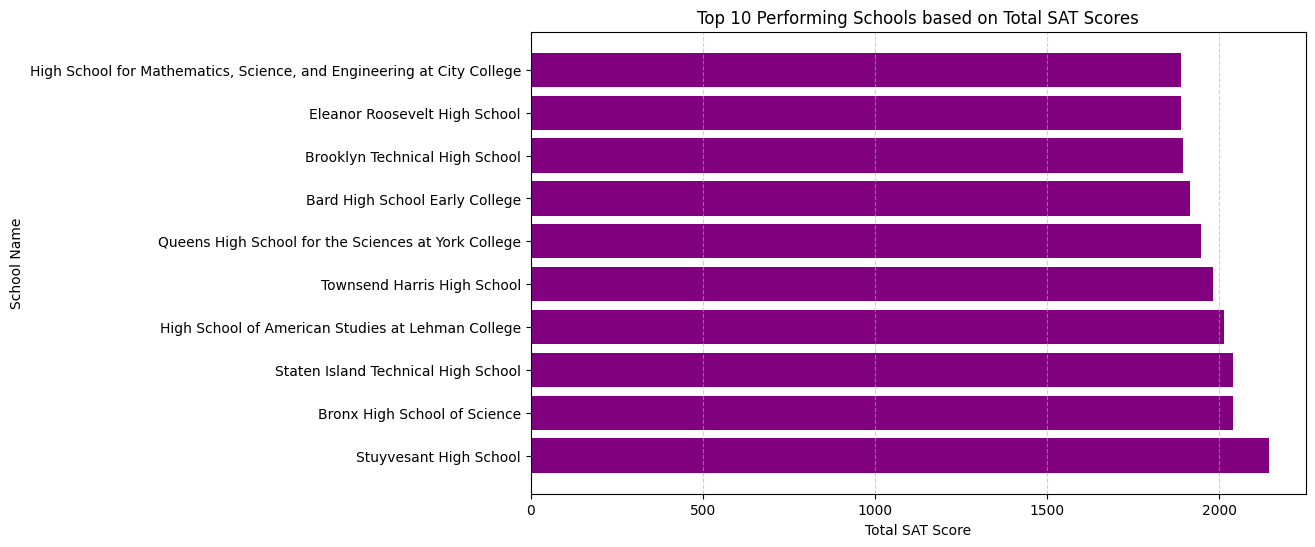

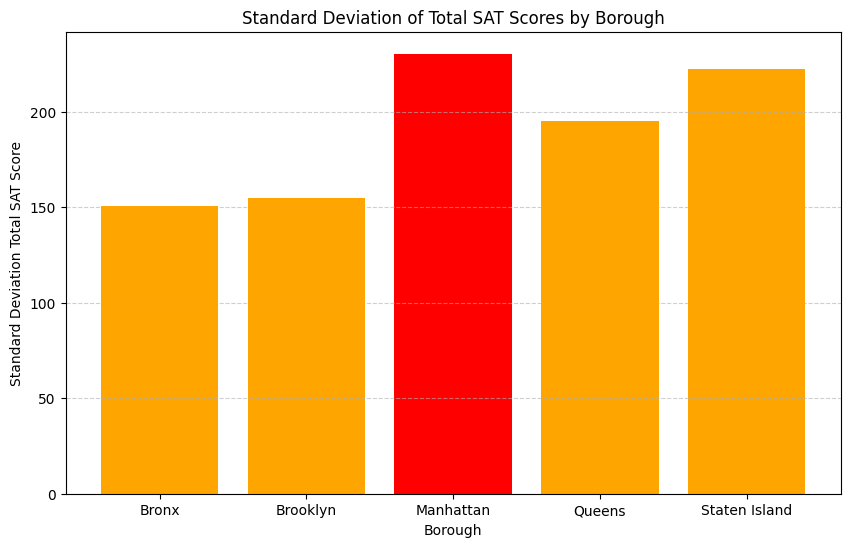

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/GitHub/Project_Exploring-NYC-Public-School-Test-Result-Scores/schools.csv'

# Read the CSV file into a DataFrame
schools = pd.read_csv(file_path)

# Filter schools with average_math scores at least 80% of the maximum score
best_math_schools = schools[schools['average_math'] >= 0.8 * 800]

# Select columns 'school_name' and 'average_math'
best_math_schools = best_math_schools[['school_name', 'average_math']]

# Sort the DataFrame by 'average_math' in descending order
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='green')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Top Math-Performing Schools')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# Calculate the total SAT score by summing the scores across the three sections
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

# Select columns 'school_name' and 'total_SAT'
top_10_schools = schools[['school_name', 'total_SAT']]

# Sort the DataFrame by 'total_SAT' in descending order and get the top 10
top_10_schools = top_10_schools.sort_values(by='total_SAT', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='purple')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.title('Top 10 Performing Schools based on Total SAT Scores')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

# Group by borough and calculate mean and standard deviation for "total_SAT"
borough_stats = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

# Rename columns for clarity
borough_stats.columns = ['num_schools', 'average_SAT', 'std_SAT']

# Find the borough with the largest standard deviation
largest_std_dev = borough_stats[borough_stats['std_SAT'] == borough_stats['std_SAT'].max()]

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for standard deviations by borough
plt.bar(borough_stats.index, borough_stats['std_SAT'], color='orange')

# Highlight the borough with the largest standard deviation
max_std_borough = largest_std_dev.index[0]
plt.bar(max_std_borough, largest_std_dev['std_SAT'].values[0], color='red')

plt.xlabel('Borough')
plt.ylabel('Standard Deviation Total SAT Score')
plt.title('Standard Deviation of Total SAT Scores by Borough')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()